In [152]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [111]:
data = pd.read_csv('food_coded.csv')

#Checking for missing values, there a lot of them
print(data.isnull().sum())

data.info()

GPA                  2
Gender               0
breakfast            0
calories_chicken     0
calories_day        19
                    ..
type_sports         26
veggies_day          0
vitamins             0
waffle_calories      0
weight               2
Length: 61, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons  

In [112]:
data

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135


In [113]:
# So I thought that it would be better if we use the names instead of coded version
data['Gender'] = data['Gender'].replace({1: 'Female', 2: 'Male'})
data['breakfast'] = data['breakfast'].replace({1: 'Cereal', 2: 'Donut'})
data['coffee'] = data['coffee'].replace({1: 'Creamy Frapuccino', 2: 'Espresso'})
data['drink'] = data['drink'].replace({1: 'Orange Juice', 2: 'Soda'})
data['fries'] = data['fries'].replace({1: 'Mcdonald’s fries', 2: 'Home fries'})
data['soup'] = data['soup'].replace({1: 'Veggie soup', 2: 'Creamy soup'})
data['sports'] = data['sports'].replace({1: 'Yes', 2: 'No'})

# Also a human being can not consume 1,2 calories daily
data['calories_day'] = data['calories_day'] * 1000\

# And income can not be 2,3,4 dollars
data['income'] = data['income'] * 100
# Because a lot of students answered incorrectly 
data['GPA'] = pd.to_numeric(data['GPA'], errors='coerce')

# Also the same reason
data['weight'] = pd.to_numeric(data['weight'].astype(str).str.replace(r'\D', '', regex=True), errors='coerce')


data

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,Male,Cereal,430,NaN,315.0,Creamy Frapuccino,none,we dont have comfort,9.0,...,Veggie soup,Yes,1,1165.0,345,car racing,5,1,1315,187.0
1,3.654,Female,Cereal,610,3000.0,420.0,Espresso,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,Veggie soup,Yes,2,725.0,690,Basketball,4,2,900,155.0
2,3.300,Female,Cereal,720,4000.0,420.0,Espresso,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,Veggie soup,No,5,1165.0,500,none,5,1,900,NaN
3,3.200,Female,Cereal,430,3000.0,420.0,Espresso,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,Veggie soup,No,5,725.0,690,NaN,3,1,1315,240.0
4,3.500,Female,Cereal,720,2000.0,420.0,Espresso,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,Veggie soup,Yes,4,940.0,500,Softball,4,2,760,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.500,Female,Cereal,610,4000.0,420.0,Espresso,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,Veggie soup,Yes,5,940.0,500,Softball,5,1,1315,156.0
121,3.000,Female,Cereal,265,2000.0,315.0,Espresso,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,Veggie soup,NaN,4,940.0,500,basketball,5,2,1315,180.0
122,3.882,Female,Cereal,720,NaN,420.0,Creamy Frapuccino,"rice, potato, seaweed soup",sadness,NaN,...,Veggie soup,No,5,580.0,690,none,4,2,1315,120.0
123,3.000,Male,Cereal,720,4000.0,420.0,Creamy Frapuccino,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,Creamy soup,No,1,940.0,500,NaN,3,1,1315,135.0


In [114]:
# We can determine the missing GPAs with mean GPA for it to be more practical
mean_GPA = data['GPA'].mean()
data['GPA'].fillna(mean_GPA, inplace = True)

# The same reason with daily_calories
mean_calories_day = data['calories_day'].mean()
data['calories_day'].fillna(mean_calories_day, inplace = True)

# And with the weight
mean_weight = data['weight'].mean()
data['weight'].fillna(mean_weight, inplace = True)

# Can not do such things for others because it would be inappropriate, it would be better if we just remove them
data = data.dropna()

data

C:\Users\Фархат\AppData\Local\Temp\ipykernel_1960\1464573047.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['GPA'].fillna(mean_GPA, inplace = True)
C:\Users\Фархат\AppData\Local\Temp\ipykernel_1960\1464573047.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
1,3.654000,Female,Cereal,610,3000.000000,420.0,Espresso,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,Veggie soup,Yes,2,725.0,690,Basketball,4,2,900,155.00000
2,3.300000,Female,Cereal,720,4000.000000,420.0,Espresso,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,Veggie soup,No,5,1165.0,500,none,5,1,900,159.04918
4,3.500000,Female,Cereal,720,2000.000000,420.0,Espresso,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,Veggie soup,Yes,4,940.0,500,Softball,4,2,760,190.00000
6,3.800000,Male,Cereal,610,3000.000000,420.0,Espresso,"Chocolate, ice cream, french fries, pretzels","stress, boredom",1.0,...,Veggie soup,Yes,5,940.0,690,soccer,4,1,1315,180.00000
7,3.300000,Female,Cereal,720,3000.000000,420.0,Creamy Frapuccino,"Ice cream, cheeseburgers, chips.",I eat comfort food when im stressed out from s...,1.0,...,Veggie soup,No,1,725.0,500,none,4,2,1315,137.00000
9,3.300000,Female,Cereal,430,3000.000000,315.0,Espresso,"Mac and cheese, chocolate, and pasta","Stress, anger and sadness",1.0,...,Veggie soup,Yes,4,580.0,345,field hockey,5,1,900,125.00000
10,3.500000,Female,Cereal,610,3000.000000,980.0,Espresso,"Pasta, grandma homemade chocolate cake anythin...",Boredom,2.0,...,Veggie soup,Yes,2,940.0,345,soccer,5,2,900,116.00000
11,3.904000,Female,Cereal,720,4000.000000,420.0,Espresso,"chocolate, pasta, soup, chips, popcorn","sadness, stress, cold weather",3.0,...,Veggie soup,Yes,5,940.0,500,Running,5,1,900,110.00000
12,3.400000,Male,Cereal,430,3000.000000,420.0,Espresso,"Cookies, popcorn, and chips","Sadness, boredom, late night snack",3.0,...,Creamy soup,Yes,3,940.0,500,Soccer and basketball,3,2,575,264.00000
13,3.600000,Female,Cereal,610,3000.000000,420.0,Espresso,"ice cream, cake, chocolate","stress, boredom, special occasions",1.0,...,Veggie soup,Yes,5,1165.0,850,intramural volleyball,5,2,1315,123.00000


In [115]:
# Because this answers were written differently
data['fav_cuisine'] = data['fav_cuisine'].str.title().str.strip()

C:\Users\Фархат\AppData\Local\Temp\ipykernel_1960\843280948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fav_cuisine'] = data['fav_cuisine'].str.title().str.strip()


In [176]:
# EDA

# 1. Average GPA by Genders
avg_gpa_by_gender = data.groupby('Gender')['GPA'].mean()
avg_gpa_by_gender

# 2. Top 3 Most Common Comfort Food Categories
top_cuisines = data['fav_cuisine'].value_counts().head(3)
top_cuisines


# 3. Percentage of Students Eating Breakfast by Gender
breakfast_by_gender = data.groupby('Gender')['breakfast'].value_counts(normalize=True).unstack() * 100


# 4. Variance in Income by Parental Education Level
income_variance_by_father_education = data.groupby('father_education')['income'].var()
income_variance_by_mother_education = data.groupby('mother_education')['income'].var()


# 5. Range of Calories in Common Food Choices
calories_range = data[['calories_chicken', 'calories_scone', 'tortilla_calories', 'turkey_calories']].agg(['min', 'max'])


# 6. Correlation between Exercise Frequency and Weight
correlation_exercise_weight = data['exercise'].corr(data['weight'])


# 7. Distribution of GPA by Grade Level (using value counts for each GPA range)
gpa_distribution_by_grade = data.groupby('grade_level')['GPA'].value_counts().unstack(fill_value=0)



# 8. Quartile Distribution of Daily Veggie Intake by Gender
veggie_quartiles_by_gender = data.groupby('Gender')['veggies_day'].quantile([0.25, 0.5, 0.75])


# 9. Top 3 Reported favourite cusines by Students with Low Income (Below 25th Percentile)
low_income_threshold = data['income'].quantile(0.25)
top_comfort_foods_low_income = data[data['income'] < low_income_threshold]['fav_cuisine'].value_counts().head(3)



# 10. Proportion of Total Calories Attributed to Each Grade Level
calories_by_grade = data.groupby('grade_level')['calories_day'].sum()
total_calories = data['calories_day'].sum()
calories_proportion_by_grade = calories_by_grade / total_calories * 100


print(avg_gpa_by_gender , '\n\n\n')
print(top_cuisines , '\n\n\n')
print(breakfast_by_gender , '\n\n\n')
print(income_variance_by_father_education , '\n\n\n')
print(income_variance_by_mother_education , '\n\n\n')
print(calories_range , '\n\n\n')
print(correlation_exercise_weight , '\n\n\n')
print(gpa_distribution_by_grade , '\n\n\n')
print(top_comfort_foods_low_income , '\n\n\n')
print(veggie_quartiles_by_gender , '\n\n\n')
print(calories_proportion_by_grade , '\n\n\n')


Gender
Female    3.420562
Male      3.513422
Name: GPA, dtype: float64 



fav_cuisine
Italian     21
Mexican      6
American     4
Name: count, dtype: int64 



breakfast  Cereal  Donut
Gender                  
Female       87.5   12.5
Male         84.0   16.0 



father_education
2.0    18594.771242
3.0     5000.000000
4.0     7938.461538
5.0     5535.714286
Name: income, dtype: float64 



mother_education
2.0    15714.285714
3.0    11428.571429
4.0     7373.188406
5.0    15636.363636
Name: income, dtype: float64 



     calories_chicken  calories_scone  tortilla_calories  turkey_calories
min               265           315.0              580.0              345
max               720           980.0             1165.0              850 



0.20655432521856676 



GPA          2.600000  2.800000  3.000000  3.100000  3.200000  3.300000  \
grade_level                                                               
1                   1         1         3         0         1         1   

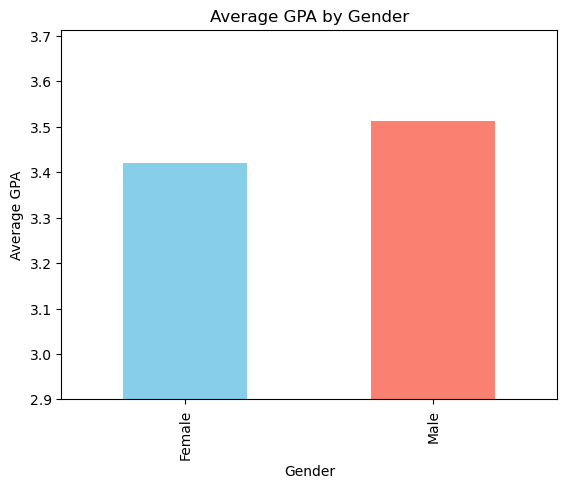

In [139]:
avg_gpa_by_gender.plot(kind='bar', color=['skyblue', 'salmon'], title="Average GPA by Gender")
plt.xlabel("Gender")
plt.ylabel("Average GPA")
plt.ylim(2.9, avg_gpa_by_gender.max() + 0.2)
plt.show()

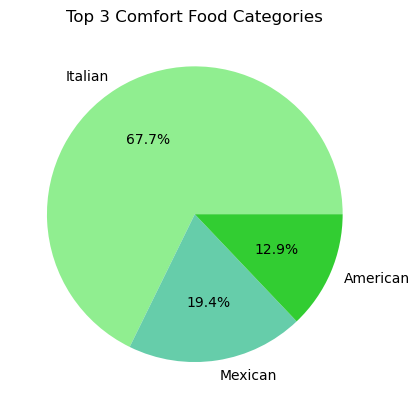

In [143]:
top_cuisines.plot(kind='pie', autopct='%1.1f%%', colors=['#90ee90', '#66cdaa', '#32cd32'], title="Top 3 Comfort Food Categories")
plt.ylabel("")
plt.show()

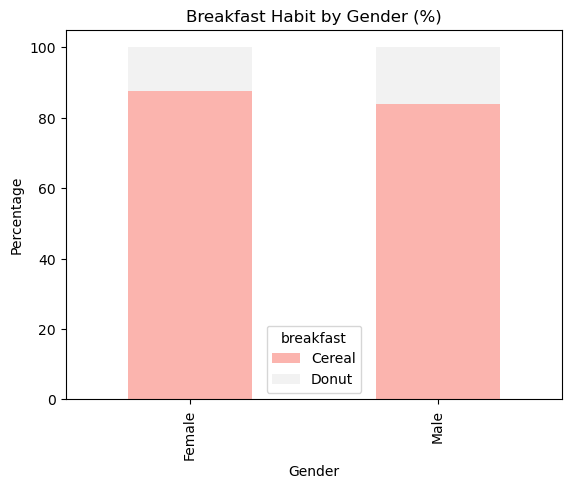

In [148]:
breakfast_by_gender.plot(kind='bar', stacked=True, colormap='Pastel1', title="Breakfast Habit by Gender (%)")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

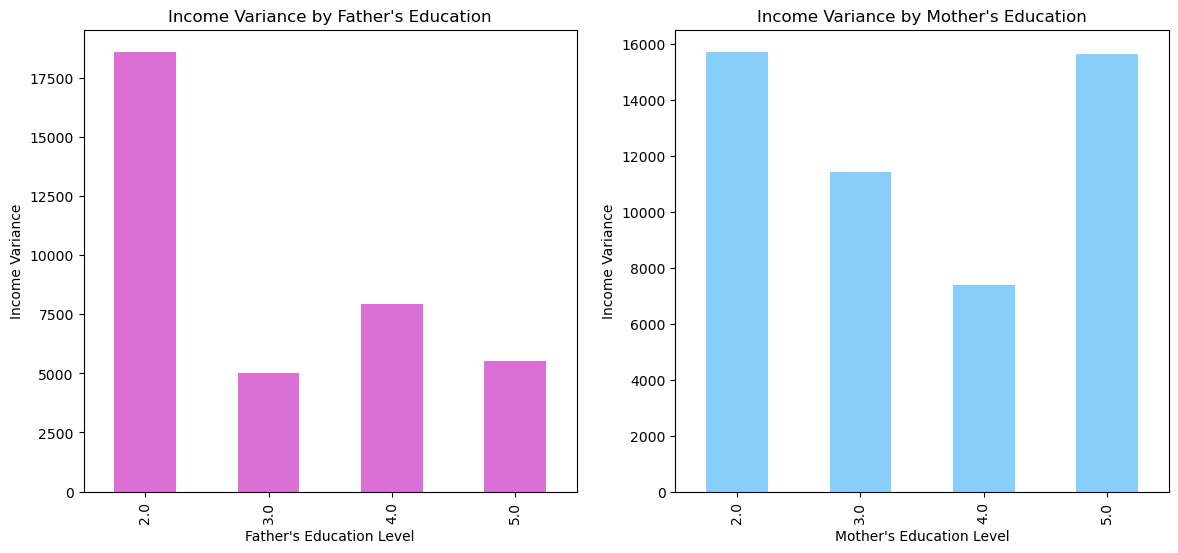

In [150]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
income_variance_by_father_education.plot(kind='bar', ax=ax[0], color='orchid', title="Income Variance by Father's Education")
income_variance_by_mother_education.plot(kind='bar', ax=ax[1], color='lightskyblue', title="Income Variance by Mother's Education")
ax[0].set_xlabel("Father's Education Level")
ax[1].set_xlabel("Mother's Education Level")
ax[0].set_ylabel("Income Variance")
ax[1].set_ylabel("Income Variance")
plt.show()

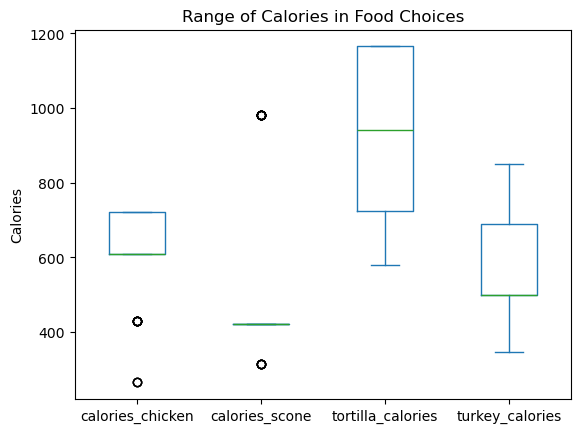

In [151]:
data[['calories_chicken', 'calories_scone', 'tortilla_calories', 'turkey_calories']].plot(kind='box', title="Range of Calories in Food Choices")
plt.ylabel("Calories")
plt.show()

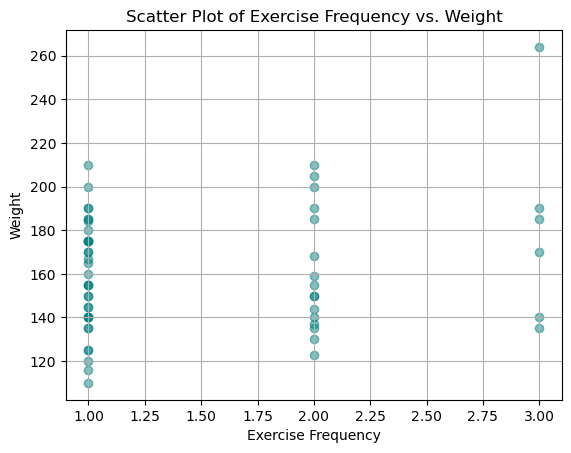

In [156]:
plt.scatter(data['exercise'], data['weight'], color='teal', alpha=0.5)
plt.title("Scatter Plot of Exercise Frequency vs. Weight")
plt.xlabel("Exercise Frequency")
plt.ylabel("Weight")
plt.grid()  
plt.show()

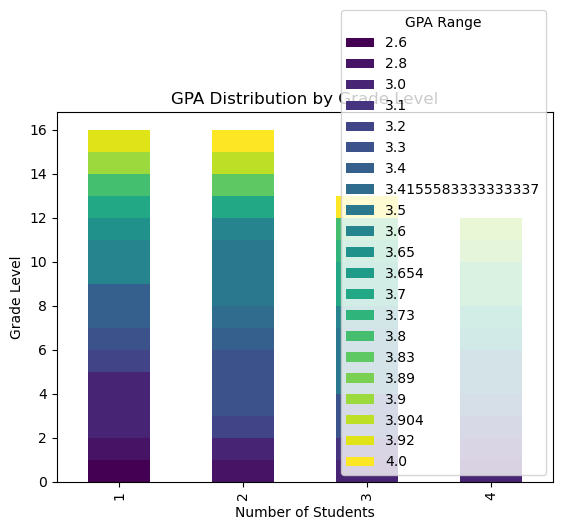

In [170]:
gpa_distribution_by_grade.plot(kind='bar', stacked=True, colormap='viridis', title="GPA Distribution by Grade Level")
plt.xlabel("Number of Students")
plt.ylabel("Grade Level")
plt.legend(title='GPA Range')
plt.show()

C:\Users\Фархат\AppData\Local\Temp\ipykernel_1960\3958536155.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='veggies_day', data=data, palette='Set3')


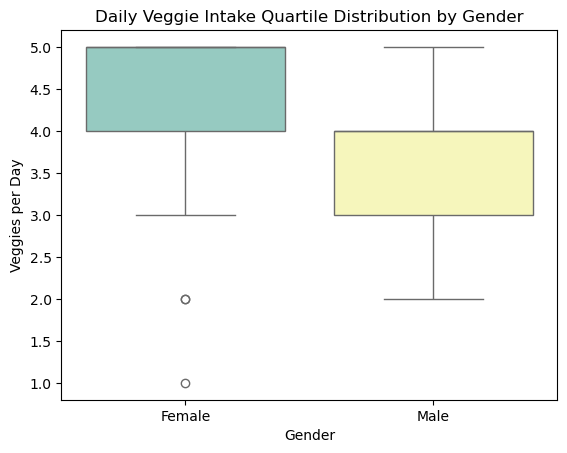

In [171]:
sns.boxplot(x='Gender', y='veggies_day', data=data, palette='Set3')
plt.title("Daily Veggie Intake Quartile Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Veggies per Day")
plt.show()

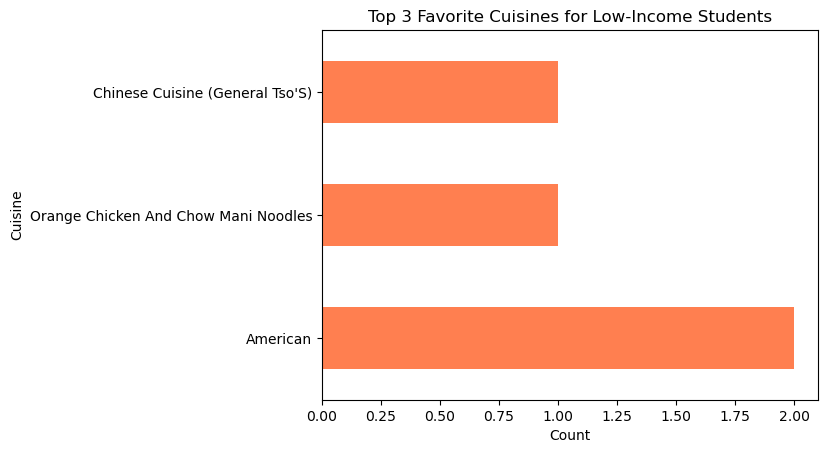

In [172]:
top_comfort_foods_low_income.plot(kind='barh', color='coral', title="Top 3 Favorite Cuisines for Low-Income Students")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()

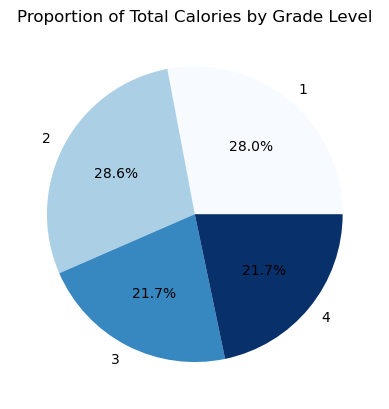

In [173]:
calories_proportion_by_grade.plot(kind='pie', autopct='%1.1f%%', colormap='Blues', title="Proportion of Total Calories by Grade Level")
plt.ylabel("")
plt.show()